In [1]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string as s
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import os
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\BINJAL SONI\OneDrive\Desktop\PDPU-Master\2nd Sem\Capstone Project\Fake News Detection\Datasets\21-02-2023\Constraint_Train.csv')
df.head(5)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [3]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()



In [4]:
le = LabelEncoder()

# Fit and transform the 'color' column
df['label'] = le.fit_transform(df['label'])

print(df)

        id                                              tweet  label
0        1  The CDC currently reports 99031 deaths. In gen...      1
1        2  States reported 1121 deaths a small rise from ...      1
2        3  Politically Correct Woman (Almost) Uses Pandem...      0
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...      1
4        5  Populous states can generate large case counts...      1
...    ...                                                ...    ...
6415  6416  A tiger tested positive for COVID-19 please st...      0
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...      0
6417  6418  _A post claims a COVID-19 vaccine has already ...      0
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund      0
6419  6420  It has been 93 days since the last case of COV...      1

[6420 rows x 3 columns]


In [5]:

print(df)

        id                                              tweet  label
0        1  The CDC currently reports 99031 deaths. In gen...      1
1        2  States reported 1121 deaths a small rise from ...      1
2        3  Politically Correct Woman (Almost) Uses Pandem...      0
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...      1
4        5  Populous states can generate large case counts...      1
...    ...                                                ...    ...
6415  6416  A tiger tested positive for COVID-19 please st...      0
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...      0
6417  6418  _A post claims a COVID-19 vaccine has already ...      0
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund      0
6419  6420  It has been 93 days since the last case of COV...      1

[6420 rows x 3 columns]


In [6]:
df

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,0
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,0
6417,6418,_A post claims a COVID-19 vaccine has already ...,0
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,0


In [7]:
df = df.set_index('id')

In [8]:
df

,tweet,label
id,,
1,The CDC currently reports 99031 deaths. In gen...,1
2,States reported 1121 deaths a small rise from ...,1
3,Politically Correct Woman (Almost) Uses Pandem...,0
4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
5,Populous states can generate large case counts...,1
...,...,...
6416,A tiger tested positive for COVID-19 please st...,0
6417,???Autopsies prove that COVID-19 is??� a blood...,0
6418,_A post claims a COVID-19 vaccine has already ...,0


In [9]:
df = df.dropna()

In [10]:
X = df.drop('label', axis = 1)

In [11]:
y = df['label']

In [12]:
X.shape

(6420, 1)

In [13]:
y.shape

(6420,)

In [14]:
voc_size = 5000

msg = X.copy()

In [15]:
#reset the index to get the proper count
msg.reset_index(inplace = True)

In [16]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
def tokenization(msg):
    lst=text.split()
    return lst
exx2=exx.apply(tokenization)

def lowercasing(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(lowercasing)

def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_punctuations)
#test_x=test_x.apply(remove_punctuations)

def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_numbers)
#test_x=test_x.apply(remove_numbers)

def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

exx2=exx2.apply(remove_stopwords)
#test_x=test_x.apply(remove_stopwords)

def remove_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_spaces)
#test_x=test_x.apply(remove_spaces)


from sklearn.feature_extraction.text import TfidfVectorizer
def TfidfVectorizer(lst):
    new_lst=[]
    for i in lst:
        i=TfidfVectorizer.TfidfVectorizer(i)
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(TfidfVectorizer)
#test_x=test_x.apply(TfidfVectorizer)


corpus = []
for i in range(0, len(exx2)):
   
    review = re.sub('[^a-zA-Z]', ' ', msg['tweet'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
len(corpus)

6420

In [19]:
msg['tweet'][0]

'The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.'

In [20]:
onehot_representation = [one_hot(words, voc_size) for words in corpus]

In [21]:
sent_length = 20
embeded_docs = pad_sequences(onehot_representation, padding = "pre", maxlen = sent_length)

embeded_docs[0]

array([   0,    0, 2392, 3237, 3631, 3971,  262, 3246, 3971,  663, 1362,
       1947,  340, 2158, 3971, 2582,  748, 1951, 4943,  130])

In [22]:
X_final = np.array(embeded_docs)


In [23]:
y_final = np.array(y)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
nb = GaussianNB()
svm_classifier = svm.SVC(kernel='linear')
dt = DecisionTreeClassifier()

In [27]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('nb', nb), ('svm_classifier', svm_classifier), ('dt', dt)], voting='hard')

In [28]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('svm_classifier', SVC(kernel='linear')),
                             ('dt', DecisionTreeClassifier())])

In [29]:
y_pred = voting_clf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7149532710280374


In [33]:
from sklearn.metrics import confusion_matrix
p_pred = voting_clf.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)
cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)



[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[[376 220]
 [146 542]]


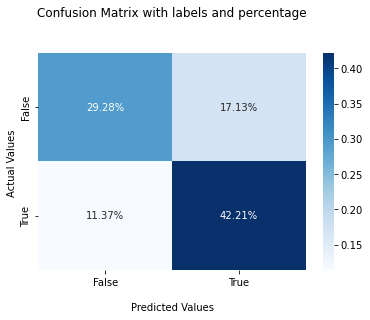

In [34]:
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix with labels and percentage\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()



In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.72      0.63      0.67       596
           1       0.71      0.79      0.75       688

    accuracy                           0.71      1284
   macro avg       0.72      0.71      0.71      1284
weighted avg       0.72      0.71      0.71      1284



In [36]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))



0.7149532710280374


In [40]:
import joblib

joblib.dump(voting_clf, 'voting_clf_without_clickbait.joblib')

['voting_clf_without_clickbait.joblib']

In [34]:
#Training a model

from tensorflow.keras.optimizers.legacy import Adam